# PHYS-E0412 Computational Physics :: Homework 12
Ari Viitala 432568

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a) Compute the groud state density of one nucleus with three electrons

In [21]:
#parameters and variables
N = 100
nocc = 3
nuclei = np.array([np.pi / 2])
L = np.pi
h = L/N
x = np.linspace(0, L, N)[1:-1]

#initializing and filling matrix T
T = np.zeros((N-2, N-2))
T += -2 * np.eye(N-2) + np.eye(N-2, k=1) + np.eye(N-2, k=-1)
T *= -1/2 * 1/h**2  

#initializing and filling vector V_ext
Vext = np.zeros_like(x)
for i in range(len(nuclei)):
    v = -85 * np.exp(-2 * (x - nuclei[i])**2)
    Vext += v    

#iteration variables
mix = 0.5
maxiter = 100
tol = 0.001
delta = 0.01

H = T + np.diag(Vext)

#solving the system
a, b = np.linalg.eigh(H)

#initializing the density functions
b /= np.sqrt(np.trapz(np.abs(b)**2, x=x, axis = 1))
dens_init = np.sum(b[:,:nocc]**2, axis = 1)
dens = dens_init

for i in range(maxiter):
    
    #calculating components for V_eff
    Vxc = -dens**(1/3)
    
    Vh = np.zeros(N-2)
    for i in range(len(x)):
        Vh[i] = np.trapz(dens / (np.abs(x[i] - x) + delta), x=x)
    
    Veff = Vext + Vh + Vxc
    
    H = T + np.diag(Veff)
                         
    a, b = np.linalg.eigh(H)
    
    b /= np.sqrt(np.trapz(np.abs(b)**2, x=x))
    
    dens_old = dens
    
    dens = np.sum(b[:,:nocc]**2, axis = 1)
    
    dens = (1 - mix) * dens_old + mix * dens
    
    if np.sum(abs(dens - dens_old)) < tol:
        break

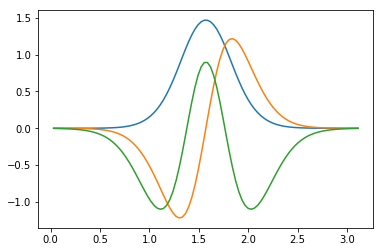

In [22]:
#plotting the first three eigenfunctions
for i in range(3):
    plt.plot(x, b[:,i])

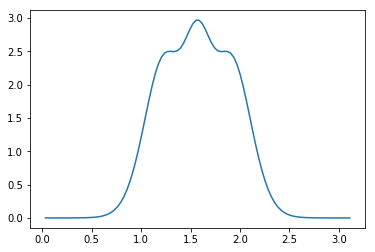

In [23]:
#plotting the densityfunction 
plt.plot(x, dens)
plt.show()

### b) Vary distance between two nuclei and six electrons. Compute the energy and find the minimum.
We will solve this like the previous one but instead initialize the problem with different distances between the particles. Once we find the solution we will calculate the energy and save it.

In [24]:
energies = []
dists = []
steps = 50
dists = np.linspace(0.05, 0.9, steps) *np.pi

for i in range(steps):
    
    N = 100
    nocc = 6
    
    dist = dists[i]
    
    nuclei = np.array([np.pi / 2 - dist / 2, np.pi / 2 + dist / 2])

    L = np.pi
    h = L/N
    x = np.linspace(0, L, N)[1:-1]

    T = np.zeros((N-2, N-2))

    T += -2 * np.eye(N-2) + np.eye(N-2, k=1) + np.eye(N-2, k=-1)
    T *= -1/2 * 1/h**2  

    Vext = np.zeros_like(x)

    for i in range(len(nuclei)):
        v = -85 * np.exp(-2 * (x - nuclei[i])**2)
        Vext += v    

    mix = 0.5
    maxiter = 100
    tol = 0.001
    delta = 0.01

    H = T + np.diag(Vext)

    a, b = np.linalg.eigh(H)

    b /= np.sqrt(np.trapz(np.abs(b)**2, x=x, axis = 1))
    dens_init = np.sum(b[:,:nocc]**2, axis = 1)
    
    dens = dens_init

    for i in range(maxiter):
        
        Vxc = -dens**(1/3)

        Vh = np.zeros(N-2)

        for i in range(len(x)):
            Vh[i] = np.trapz(dens / (np.abs(x[i] - x) + delta), x=x)

        Veff = Vext + Vh + Vxc

        H = T + np.diag(Veff)

        a, b = np.linalg.eigh(H)

        b /= np.sqrt(np.trapz(np.abs(b)**2, x=x))

        dens_old = dens

        dens = np.sum(b[:,:nocc]**2, axis = 1)

        dens = (1 - mix) * dens_old + mix * dens
            
            
        if np.sum(abs(dens - dens_old)) < tol:
            break
    
    #calculating the energy
    E = np.sum(a[:nocc]) - 0.5 * np.trapz(Vh * dens, x = x) + 9 / (nuclei[0] - nuclei[1])**2
    
    energies.append(E)

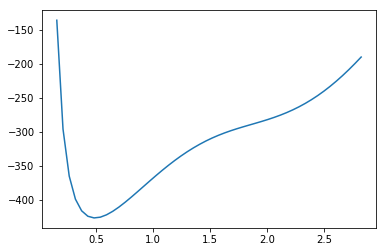

In [25]:
plt.plot(dists, energies)
plt.show()

In [19]:
print("Distance at minimum: {}".format(dists[np.argmin(energies)]))
print("Energy at minimum: {}".format(np.min(energies)))

Distance at minimum: 0.4840617251959784
Energy at minimum: -426.21724756097916


If we plot the energy as a function of distance between the particles we see that it is minimized at the distance of about 0.5. Further analysis reveals that the the enery is minized at 0.484 and then the energy is about -426.2.